In [ ]:
Project Title:
Music Genre Classification using K-Nearest Neighbors (KNN)

In [ ]:
Objective:
Predict the genre of a song (Pop, Rock, Classical, or Jazz) based on its measurable musical features.

Algorithm:
K-Nearest Neighbors (KNN):
A simple, distance-based algorithm.
It classifies new samples by the majority vote of their k nearest neighbors.

In [7]:
# Dataset Creation
np.random.seed(42)

n_samples = 200
data = {
    'Danceability': np.random.rand(n_samples),
    'Energy': np.random.rand(n_samples),
    'Tempo': np.random.randint(60, 200, n_samples),
    'Loudness': np.random.uniform(-60, 0, n_samples),
    'Acousticness': np.random.rand(n_samples),
    'Instrumentalness': np.random.rand(n_samples),
    'Valence': np.random.rand(n_samples),  # mood positivity
    'Duration_ms': np.random.randint(150000, 300000, n_samples),  # length of song
    'Genre': np.random.choice(['Pop', 'Rock', 'Classical', 'Jazz'], n_samples)
}

df = pd.DataFrame(data)
print("Sample Data:\n", df.head(), "\n")


Sample Data:
    Danceability    Energy  Tempo   Loudness  Acousticness  Instrumentalness  \
0      0.374540  0.642032    164 -48.462659      0.696651          0.950237   
1      0.950714  0.084140     89 -57.547883      0.922499          0.446006   
2      0.731994  0.161629     76 -49.863896      0.707239          0.185133   
3      0.598658  0.898554    172 -43.284580      0.152539          0.541901   
4      0.156019  0.606429    121 -49.379371      0.576288          0.872946   

    Valence  Duration_ms      Genre  
0  0.749652       229530        Pop  
1  0.130086       258856        Pop  
2  0.758263       221635  Classical  
3  0.024587       257803  Classical  
4  0.022124       185946       Jazz   



In [9]:
# Data Preprocessing
X = df.drop('Genre', axis=1)
y = df['Genre']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training & Evaluation
def evaluate_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    return acc, preds


In [11]:

# Test different k values
k_values = range(1, 15)
accuracies = []
for k in k_values:
    acc, _ = evaluate_knn(k)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k} with Accuracy = {max(accuracies)*100:.2f}%")

# Train final model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


Best k value: 1 with Accuracy = 42.00%



 Classification Report:
               precision    recall  f1-score   support

   Classical       0.12      0.14      0.13         7
        Jazz       0.55      0.38      0.44        16
         Pop       0.38      0.67      0.48         9
        Rock       0.53      0.44      0.48        18

    accuracy                           0.42        50
   macro avg       0.39      0.41      0.39        50
weighted avg       0.45      0.42      0.42        50



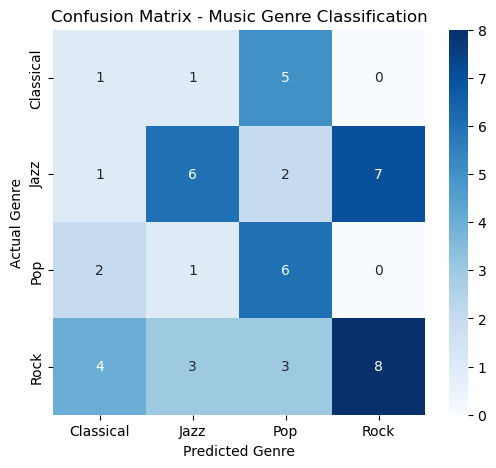

In [13]:
# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix - Music Genre Classification")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.show()

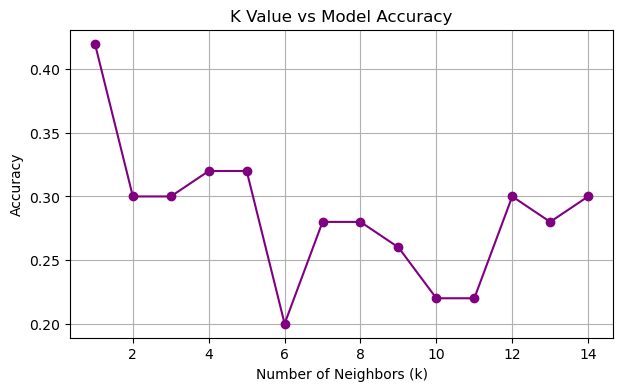

In [15]:
# Accuracy vs K Visualization
plt.figure(figsize=(7, 4))
plt.plot(k_values, accuracies, marker='o', color='purple')
plt.title("K Value vs Model Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

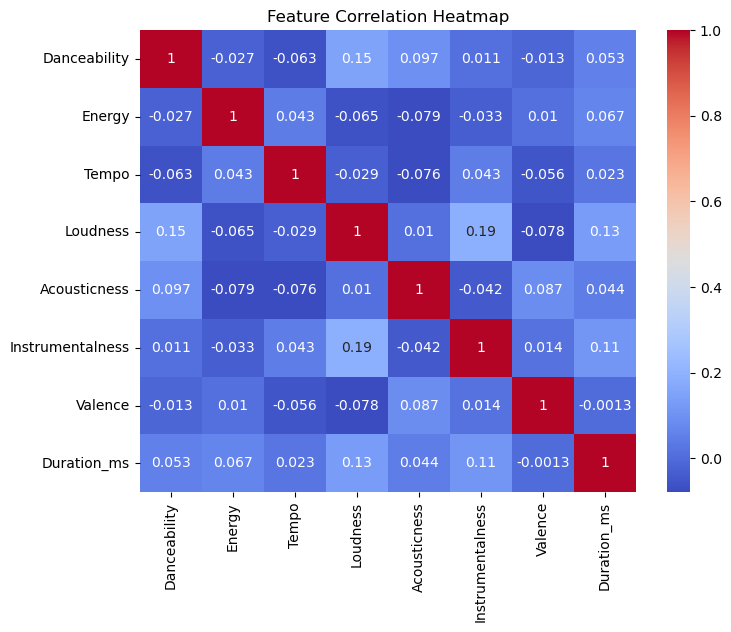

In [17]:
# Feature Co# Feature Correlation Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Genre', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

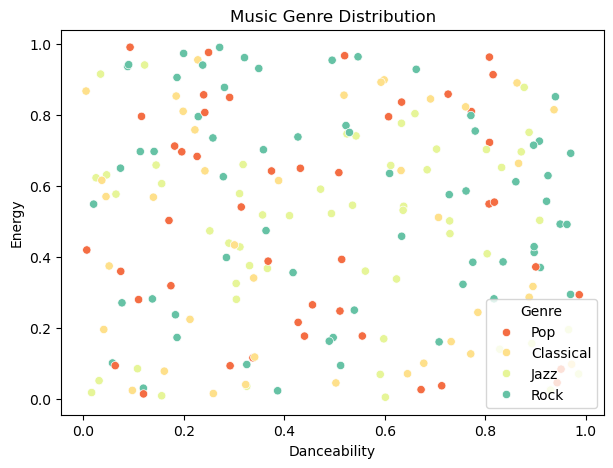

In [19]:
# 2D Visualization of Clusters (Danceability vs Energy)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Danceability', y='Energy', hue='Genre', data=df, palette='Spectral')
plt.title("Music Genre Distribution")
plt.show()